# UTKFace Efficientnet Training with Distance Weight

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import random
import pickle

import torch
import torch.nn as nn
import torch.optim as optim

# created library
import mydata
from mymodels import TransDataset, LoadDataset, EfficientB7Model, ResNet50Model, VGG16Model
from distancetraining import ModelTrainer

In [2]:
# to reproduce
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True # GPUの計算過程の変化をさせない

In [3]:
db = "UTKFace"
root = f"../../dataset/AAAI 2025/{db}/"
df_train = mydata.load_and_process_csv(f"{root}/dataframe/df_train.csv")
df_valid = mydata.load_and_process_csv(f"{root}/dataframe/df_valid.csv")
df_test = mydata.load_and_process_csv(f"{root}/dataframe/df_test.csv")

model_name = "EFF"
polynomial_save_file = f"{root}estimator/f1_{model_name}.pkl"
model_save_directory = f"{root}/novel_model/efficientnet/"
df_valid_filepath = f"{root}/evaluation/df_valid_{model_name}_f1.csv"
df_test_filepath = f"{root}/evaluation/df_test_{model_name}_f1.csv"

In [4]:
ycol="labels"
batch_size = 8 # １インプットずつペナルティを付加するため

ld = LoadDataset(df_train, df_valid, df_test, ycol, batch_size)
train_loader, valid_loader, test_loader = ld.create_dataloaders()

H*W:  (200, 200)


Validation Accuracy: 0.7957 | Loss: 0.4916 | F1: 0.7785 | AUC: 0.8918
Validation Accuracy: 0.8444 | Loss: 0.3658 | F1: 0.8275 | AUC: 0.9391
Validation Accuracy: 0.8666 | Loss: 0.3235 | F1: 0.8547 | AUC: 0.9565
Validation Accuracy: 0.8746 | Loss: 0.2878 | F1: 0.8643 | AUC: 0.9641
Validation Accuracy: 0.8737 | Loss: 0.2713 | F1: 0.8622 | AUC: 0.9679
Validation Accuracy: 0.8956 | Loss: 0.2597 | F1: 0.8904 | AUC: 0.9707
Validation Accuracy: 0.8838 | Loss: 0.2597 | F1: 0.8738 | AUC: 0.9718
Validation Accuracy: 0.8981 | Loss: 0.2410 | F1: 0.8921 | AUC: 0.9756
Validation Accuracy: 0.8985 | Loss: 0.2342 | F1: 0.8924 | AUC: 0.9767
Validation Accuracy: 0.8884 | Loss: 0.2278 | F1: 0.8791 | AUC: 0.9771
Validation Accuracy: 0.9115 | Loss: 0.2147 | F1: 0.9080 | AUC: 0.9786
Validation Accuracy: 0.9169 | Loss: 0.2207 | F1: 0.9154 | AUC: 0.9761
Validation Accuracy: 0.9052 | Loss: 0.2137 | F1: 0.8996 | AUC: 0.9786
Validation Accuracy: 0.9190 | Loss: 0.2027 | F1: 0.9171 | AUC: 0.9780
Validation Accuracy:

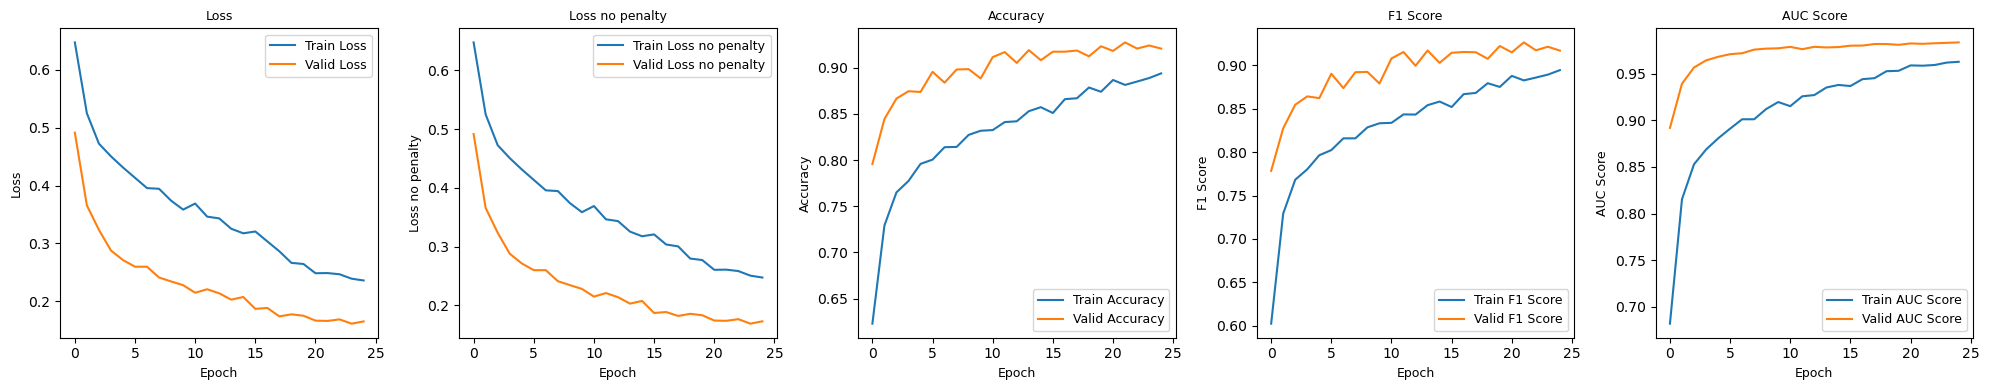

In [209]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EfficientB7Model().to(device) # model -> GPU

# Load model
with open(polynomial_save_file, "rb") as f:
    polynomial_model = pickle.load(f)

num_epochs = 25
lr = 1e-5
start = 16
trainer = ModelTrainer(polynomial_model, model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, start, num_epochs=num_epochs, lr=lr)

In [210]:
model = EfficientB7Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions, test_outputs = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
tmp["proba"] = test_outputs
tmp.to_csv(df_valid_filepath, index=False)
trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1181
           1       0.94      0.92      0.93      1203

    accuracy                           0.93      2384
   macro avg       0.93      0.93      0.93      2384
weighted avg       0.93      0.93      0.93      2384

Skin tone 1: Accuracy 0.9395509499136442
Skin tone 3: Accuracy 0.9540816326530612
Skin tone 0: Accuracy 0.9371900826446281
Skin tone 2: Accuracy 0.8888888888888888


In [211]:
test_predictions, test_outputs = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
tmp["proba"] = test_outputs
tmp.to_csv(df_test_filepath, index=False)
trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1171
           1       0.92      0.91      0.92      1177

    accuracy                           0.92      2348
   macro avg       0.92      0.92      0.92      2348
weighted avg       0.92      0.92      0.92      2348

Skin tone 1: Accuracy 0.9265232974910395
Skin tone 3: Accuracy 0.9373913043478261
Skin tone 2: Accuracy 0.8828382838283828
Skin tone 0: Accuracy 0.9261083743842364


# Resnet

In [9]:
model_name = "RES"
polynomial_save_file = f"{root}estimator/f1_{model_name}.pkl"
model_save_directory = f"{root}/novel_model/resnet/"
df_valid_filepath = f"{root}/evaluation/df_valid_{model_name}_f1.csv"
df_test_filepath = f"{root}/evaluation/df_test_{model_name}_f1.csv"

Validation Accuracy: 0.5323 | Loss: 0.6090 | F1: 0.1403 | AUC: 0.8169
Validation Accuracy: 0.7076 | Loss: 0.4810 | F1: 0.6028 | AUC: 0.8826
Validation Accuracy: 0.7773 | Loss: 0.3994 | F1: 0.7259 | AUC: 0.9152
Validation Accuracy: 0.8268 | Loss: 0.3624 | F1: 0.8040 | AUC: 0.9324
Validation Accuracy: 0.7873 | Loss: 0.3678 | F1: 0.7399 | AUC: 0.9392
Validation Accuracy: 0.8444 | Loss: 0.3232 | F1: 0.8266 | AUC: 0.9499
Validation Accuracy: 0.8486 | Loss: 0.2993 | F1: 0.8304 | AUC: 0.9534
Validation Accuracy: 0.8805 | Loss: 0.2788 | F1: 0.8736 | AUC: 0.9563
Validation Accuracy: 0.8767 | Loss: 0.2746 | F1: 0.8686 | AUC: 0.9591
Validation Accuracy: 0.8775 | Loss: 0.2574 | F1: 0.8699 | AUC: 0.9626
Validation Accuracy: 0.8540 | Loss: 0.2780 | F1: 0.8352 | AUC: 0.9629
Validation Accuracy: 0.8784 | Loss: 0.2504 | F1: 0.8683 | AUC: 0.9655
Validation Accuracy: 0.8935 | Loss: 0.2360 | F1: 0.8887 | AUC: 0.9688
Validation Accuracy: 0.8997 | Loss: 0.2322 | F1: 0.8987 | AUC: 0.9689
Validation Accuracy:

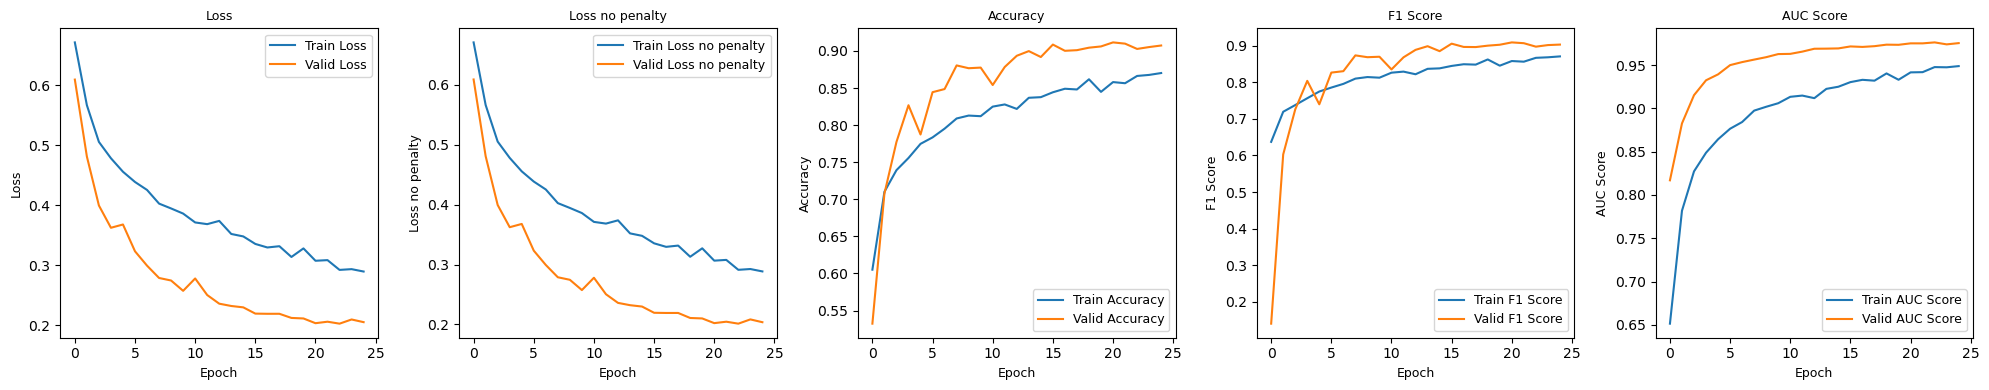

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet50Model().to(device) # model -> GPU

# Load model
with open(polynomial_save_file, "rb") as f:
    polynomial_model = pickle.load(f)

num_epochs = 25
lr = 1e-5
start = 17
trainer = ModelTrainer(polynomial_model, model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, start, num_epochs=num_epochs, lr=lr)

In [11]:
model = ResNet50Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions, test_outputs = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
tmp["proba"] = test_outputs
tmp.to_csv(df_valid_filepath, index=False)
trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1181
           1       0.94      0.88      0.91      1203

    accuracy                           0.91      2384
   macro avg       0.91      0.91      0.91      2384
weighted avg       0.91      0.91      0.91      2384

Skin tone 1: Accuracy 0.9309153713298791
Skin tone 3: Accuracy 0.9319727891156463
Skin tone 0: Accuracy 0.9107438016528926
Skin tone 2: Accuracy 0.8725490196078431


In [12]:
test_predictions, test_outputs = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
tmp["proba"] = test_outputs
tmp.to_csv(df_test_filepath, index=False)
trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1171
           1       0.93      0.89      0.91      1177

    accuracy                           0.91      2348
   macro avg       0.91      0.91      0.91      2348
weighted avg       0.91      0.91      0.91      2348

Skin tone 1: Accuracy 0.9283154121863799
Skin tone 3: Accuracy 0.9252173913043479
Skin tone 2: Accuracy 0.8729372937293729
Skin tone 0: Accuracy 0.9129720853858785


# VGG

In [163]:
model_name = "VGG"
polynomial_save_file = f"{root}estimator/f1_{model_name}.pkl"
model_save_directory = f"{root}/novel_model/vgg/"
df_valid_filepath = f"{root}/evaluation/df_valid_{model_name}_f1.csv"
df_test_filepath = f"{root}/evaluation/df_test_{model_name}_f1.csv"

Validation Accuracy: 0.6971 | Loss: 0.6444 | F1: 0.6394 | AUC: 0.7757
Validation Accuracy: 0.7416 | Loss: 0.5888 | F1: 0.7522 | AUC: 0.8093
Validation Accuracy: 0.7739 | Loss: 0.4812 | F1: 0.7612 | AUC: 0.8470
Validation Accuracy: 0.7844 | Loss: 0.4368 | F1: 0.7623 | AUC: 0.8706
Validation Accuracy: 0.8066 | Loss: 0.4192 | F1: 0.7981 | AUC: 0.8853
Validation Accuracy: 0.8150 | Loss: 0.3948 | F1: 0.8036 | AUC: 0.8979
Validation Accuracy: 0.8117 | Loss: 0.3738 | F1: 0.7905 | AUC: 0.9074
Validation Accuracy: 0.8184 | Loss: 0.3595 | F1: 0.7994 | AUC: 0.9178
Validation Accuracy: 0.8209 | Loss: 0.3458 | F1: 0.7964 | AUC: 0.9237
Validation Accuracy: 0.8402 | Loss: 0.3285 | F1: 0.8263 | AUC: 0.9295
Validation Accuracy: 0.8347 | Loss: 0.3195 | F1: 0.8176 | AUC: 0.9330
Validation Accuracy: 0.8549 | Loss: 0.3082 | F1: 0.8466 | AUC: 0.9385
Validation Accuracy: 0.8347 | Loss: 0.3112 | F1: 0.8148 | AUC: 0.9382
Validation Accuracy: 0.8578 | Loss: 0.2962 | F1: 0.8493 | AUC: 0.9422
Validation Accuracy:

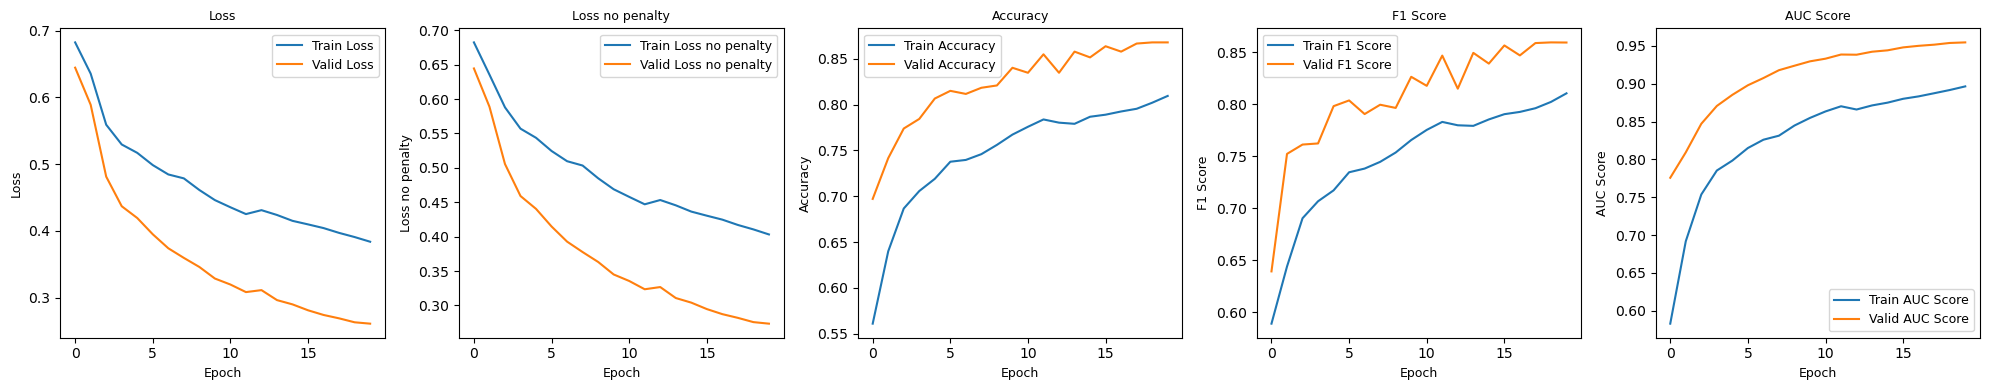

In [164]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VGG16Model().to(device) # model -> GPU

# Load model
with open(polynomial_save_file, "rb") as f:
    polynomial_model = pickle.load(f)

num_epochs = 20
lr = 1e-6
start = 1
trainer = ModelTrainer(polynomial_model, model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, start, num_epochs=num_epochs, lr=lr)

In [165]:
model = VGG16Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions, test_outputs = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
tmp["proba"] = test_outputs
tmp.to_csv(df_valid_filepath, index=False)
trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1181
           1       0.90      0.85      0.88      1203

    accuracy                           0.88      2384
   macro avg       0.88      0.88      0.88      2384
weighted avg       0.88      0.88      0.88      2384

Skin tone 1: Accuracy 0.8877374784110535
Skin tone 3: Accuracy 0.9149659863945578
Skin tone 0: Accuracy 0.8793388429752066
Skin tone 2: Accuracy 0.8300653594771242


In [166]:
test_predictions, test_outputs = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
tmp["proba"] = test_outputs
tmp.to_csv(df_test_filepath, index=False)
trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1171
           1       0.89      0.85      0.87      1177

    accuracy                           0.87      2348
   macro avg       0.87      0.87      0.87      2348
weighted avg       0.87      0.87      0.87      2348

Skin tone 1: Accuracy 0.8799283154121864
Skin tone 3: Accuracy 0.9008695652173913
Skin tone 2: Accuracy 0.8283828382838284
Skin tone 0: Accuracy 0.8866995073891626
